In [ ]:
pip install pandas-datareader

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import datetime
startDate = datetime.datetime(2020, 7, 30)
endDate = datetime.datetime(2020, 8, 4)

In [ ]:
import pandas_datareader as pdr
stock = pdr.get_data_yahoo("F", startDate, endDate)

In [ ]:
stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-30,6.83,6.67,6.74,6.74,58991000,6.74
2020-07-31,6.90,6.52,6.89,6.61,115394100,6.61
2020-08-03,6.72,6.53,6.65,6.69,53805300,6.69


In [ ]:
df = stock.pct_change()["Adj Close"]

In [ ]:
df

Date
2020-07-30         NaN
2020-07-31   -0.019288
2020-08-03    0.012103
Name: Adj Close, dtype: float64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

Date
2020-07-31   -0.019288
2020-08-03    0.012103
Name: Adj Close, dtype: float64

In [ ]:
index = pdr.get_data_yahoo("^NSEI", startDate, endDate)

In [ ]:
index

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-30,11299.950195,11084.950195,11254.299805,11102.150391,677800,11102.150391
2020-07-31,11150.400391,11026.650391,11139.500000,11073.450195,642600,11073.450195
2020-08-03,11058.049805,10882.250000,11057.549805,10891.599609,680900,10891.599609
2020-08-04,11039.599609,10908.099609,10946.650391,11035.150391,0,11035.150391


In [ ]:
oil = pdr.fred.FredReader("DCOILWTICO", startDate, endDate).read()
oil

,DCOILWTICO
DATE,


In [ ]:
gold = pdr.fred.FredReader("GOLDAMGBD228NLBM", startDate, endDate).read()
gold

,GOLDAMGBD228NLBM
DATE,
2020-07-30,1952.20
2020-07-31,1974.70
2020-08-03,1972.95


In [ ]:
naturalGas = pdr.fred.FredReader("DHHNGSP", startDate, endDate).read()
naturalGas

,DHHNGSP
DATE,


In [ ]:
variables = pd.DataFrame()

In [ ]:
variables['Index'] = index["Adj Close"]
variables['Oil'] = oil["DCOILWTICO"]
variables['Gold'] = gold['GOLDAMGBD228NLBM']
variables['NaturalGas'] = naturalGas['DHHNGSP']
variables

,Index,Oil,Gold,NaturalGas
Date,,,,
2020-07-30,11102.150391,NaN,1952.20,NaN
2020-07-31,11073.450195,NaN,1974.70,NaN
2020-08-03,10891.599609,NaN,1972.95,NaN
2020-08-04,11035.150391,NaN,NaN,NaN


In [ ]:
pip install quandl

In [ ]:
variables.columns

Index(['Index', 'Oil', 'Gold', 'NaturalGas'], dtype='object')

In [ ]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 5, 14)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving splist.csv to splist.csv


In [ ]:
splist = pd.read_csv("splist.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sp.csv to sp.csv


In [ ]:
Tickers = pd.read_csv("sp.csv")

In [ ]:
dummy = variables
 
dummy

,Index,Oil,Gold,NaturalGas
Date,,,,
2006-01-03,94.888084,63.11,520.75,9.90
2006-01-04,95.337463,63.41,534.35,9.25
2006-01-05,95.397354,62.81,531.60,9.24
2006-01-06,96.191185,64.21,529.50,9.30
2006-01-09,96.438316,63.56,541.00,8.79
...,...,...,...,...
2020-05-08,292.440002,24.73,NaN,1.74
2020-05-11,292.500000,24.02,1698.80,1.70
2020-05-12,286.670013,NaN,1703.45,1.61


In [ ]:
'''
Put below code in for loop
y = data.DataReader(ddd['Stocks'][0], 'yahoo', start, end)
y.drop(axis = 1, columns = 'High', inplace = True)
y.drop(axis = 1, columns = 'Low', inplace = True)
y.drop(axis = 1, columns = 'Open', inplace = True)
y.drop(axis = 1, columns = 'Volume', inplace = True)
y.drop(axis = 1, columns = 'Close', inplace = True)
y[ddd['Stocks'][0]] = y['Adj Close']
variables = pd.concat([variables, y], axis=1)

'''

In [ ]:
y = pd.DataFrame()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [ ]:
for x in splist['Stocks']:
  y = data.DataReader(x, 'yahoo', start, end)
  y.drop(axis = 1, columns = 'High', inplace = True)
  y.drop(axis = 1, columns = 'Low', inplace = True)
  y.drop(axis = 1, columns = 'Open', inplace = True)
  y.drop(axis = 1, columns = 'Volume', inplace = True)
  y.drop(axis = 1, columns = 'Close', inplace = True)
  y[x] = y['Adj Close']
  y.drop(axis = 1, columns = 'Adj Close', inplace = True)
  abc = pd.concat([dummy, y], axis=1)
  dummy = abc

In [ ]:
len(dummy.columns)

507

In [ ]:
Stock_Final = dummy

In [ ]:
dummy

,Index,Oil,Gold,NaturalGas,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,...,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAC,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-03,94.888084,63.11,520.75,9.90,54.325886,10.491420,NaN,9.350000,22.193466,6.246245,38.520000,32.400002,41.280529,12.645525,12.472534,20.609097,37.510666,20.799999,7.768126,16.245050,52.171452,5.072500,6.280000,NaN,35.094173,8.113237,38.596119,217.832840,216.802368,8.196486,47.580002,NaN,27.279346,35.305672,20.759733,41.785267,1008.070435,23.406059,NaN,30.914152,...,17.124069,4.235523,34.317883,43.818691,19.653145,18.307697,NaN,13.375475,27.900000,NaN,NaN,32.497120,56.548016,16.760929,12.814566,33.261307,34.319111,20.019037,19.829746,38.099998,10.902980,20.408512,15.558152,14.933684,NaN,NaN,41.382812,56.847565,10.783240,67.368279,29.771486,10.574396,32.808895,18.621290,NaN,11.461523,42.830002,63.671101,62.799614,NaN
2006-01-04,95.337463,63.41,534.35,9.25,54.051186,10.507332,NaN,9.620000,22.314663,6.322419,38.419998,32.560001,41.574577,13.184132,12.542169,20.664463,37.082756,21.320000,7.922389,15.919917,52.374161,5.105000,6.080000,NaN,35.939243,8.221411,38.553802,222.842850,221.788681,8.255515,47.250000,NaN,27.142586,36.955460,20.726402,41.379032,1009.518188,24.126240,NaN,31.883423,...,17.294189,4.220896,34.665092,43.722233,19.713095,17.917089,NaN,13.767318,28.309999,NaN,NaN,32.549992,55.905727,17.161318,13.093968,33.326073,33.253017,19.682652,19.571129,37.830002,10.938501,20.171795,15.724768,15.436182,NaN,NaN,42.382610,57.108891,10.850919,68.067940,29.716314,10.625648,32.764881,19.459511,NaN,11.559587,42.410000,64.275429,63.243000,NaN
2006-01-05,95.397354,62.81,531.60,9.24,53.556747,10.642622,NaN,9.550000,22.481304,6.376189,38.070000,33.680000,41.773777,13.059235,12.643947,21.205837,36.761833,21.600000,7.836444,15.919917,53.045620,5.062500,6.210000,NaN,35.996208,8.164477,38.659603,225.845840,224.777481,8.234749,47.650002,NaN,26.911137,37.436264,20.609703,41.817112,1010.821289,24.049078,NaN,32.257935,...,17.279400,4.249379,34.576717,42.968102,20.114798,18.078426,NaN,13.925823,29.480000,NaN,NaN,32.761497,56.498638,17.095734,12.857186,32.872780,32.950569,20.027239,19.648714,37.259998,10.894776,20.149401,16.048986,15.287004,NaN,NaN,42.010017,57.198292,10.738125,67.036888,29.539719,10.619951,32.412811,20.630112,NaN,12.052371,42.529999,63.596718,63.817776,NaN
2006-01-06,96.191185,64.21,529.50,9.30,53.996277,10.846883,NaN,9.750000,23.594763,6.671922,39.000000,33.779999,41.726341,13.269994,13.096563,21.316574,37.617630,22.469999,7.770330,15.808883,53.653763,5.107500,6.190000,NaN,36.850784,8.241339,38.673695,233.063065,231.960556,8.302523,47.869999,NaN,27.305647,36.766911,20.931984,41.960484,1015.165100,24.417744,NaN,32.015602,...,17.027901,4.300187,35.283768,42.827797,20.444546,17.798206,NaN,14.001892,31.280001,NaN,NaN,33.082554,57.643246,17.244152,12.961370,33.009495,32.791798,20.297989,19.745703,37.349998,10.976756,20.267757,16.116537,15.624621,NaN,NaN,42.072117,57.542099,10.778726,66.226768,29.821154,10.659812,32.214756,21.041996,NaN,12.018044,44.119999,63.271294,64.482903,NaN
2006-01-09,96.438316,63.56,541.00,8.79,54.264061,11.250092,NaN,10.150000,23.526592,6.609190,38.380001,33.250000,42.267006,13.043621,13.158159,21.255054,37.139397,22.129999,7.895944,15.824748,54.350540,5.180000,6.340000,NaN,36.841290,8.187248,38.539700,233.683685,232.578247,8.327667,47.080002,NaN,27.174147,36.399246,20.620821,43.003925,1010.386902,24.949312,NaN,33.109707,...,17.005713,4.462618,35.511051,43.643314,20.678368,18.333172,NaN,14.059954,33.099998,NaN,NaN,33.456459,57.478577,17.409826,12.819303,32.887177,33.200081,20.511309,20.068975,38.340000,11.025939,20.264565,16.346191,16.598215,NaN,NaN,41.972755,58.442909,10.9546

In [ ]:
abc = variables

In [ ]:
returns = pd.DataFrame()

In [ ]:
Tickers

,Stocks
0,Index
1,Oil
2,Gold
3,NaturalGas
4,MMM
...,...
502,YUM
503,ZBRA
504,ZBH
505,ZION


In [ ]:
Stock_Final

,Index,Oil,Gold,NaturalGas,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,...,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAC,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-03,94.888084,63.11,520.75,9.90,54.325886,10.491420,NaN,9.350000,22.193466,6.246245,38.520000,32.400002,41.280529,12.645525,12.472534,20.609097,37.510666,20.799999,7.768126,16.245050,52.171452,5.072500,6.280000,NaN,35.094173,8.113237,38.596119,217.832840,216.802368,8.196486,47.580002,NaN,27.279346,35.305672,20.759733,41.785267,1008.070435,23.406059,NaN,30.914152,...,17.124069,4.235523,34.317883,43.818691,19.653145,18.307697,NaN,13.375475,27.900000,NaN,NaN,32.497120,56.548016,16.760929,12.814566,33.261307,34.319111,20.019037,19.829746,38.099998,10.902980,20.408512,15.558152,14.933684,NaN,NaN,41.382812,56.847565,10.783240,67.368279,29.771486,10.574396,32.808895,18.621290,NaN,11.461523,42.830002,63.671101,62.799614,NaN
2006-01-04,95.337463,63.41,534.35,9.25,54.051186,10.507332,NaN,9.620000,22.314663,6.322419,38.419998,32.560001,41.574577,13.184132,12.542169,20.664463,37.082756,21.320000,7.922389,15.919917,52.374161,5.105000,6.080000,NaN,35.939243,8.221411,38.553802,222.842850,221.788681,8.255515,47.250000,NaN,27.142586,36.955460,20.726402,41.379032,1009.518188,24.126240,NaN,31.883423,...,17.294189,4.220896,34.665092,43.722233,19.713095,17.917089,NaN,13.767318,28.309999,NaN,NaN,32.549992,55.905727,17.161318,13.093968,33.326073,33.253017,19.682652,19.571129,37.830002,10.938501,20.171795,15.724768,15.436182,NaN,NaN,42.382610,57.108891,10.850919,68.067940,29.716314,10.625648,32.764881,19.459511,NaN,11.559587,42.410000,64.275429,63.243000,NaN
2006-01-05,95.397354,62.81,531.60,9.24,53.556747,10.642622,NaN,9.550000,22.481304,6.376189,38.070000,33.680000,41.773777,13.059235,12.643947,21.205837,36.761833,21.600000,7.836444,15.919917,53.045620,5.062500,6.210000,NaN,35.996208,8.164477,38.659603,225.845840,224.777481,8.234749,47.650002,NaN,26.911137,37.436264,20.609703,41.817112,1010.821289,24.049078,NaN,32.257935,...,17.279400,4.249379,34.576717,42.968102,20.114798,18.078426,NaN,13.925823,29.480000,NaN,NaN,32.761497,56.498638,17.095734,12.857186,32.872780,32.950569,20.027239,19.648714,37.259998,10.894776,20.149401,16.048986,15.287004,NaN,NaN,42.010017,57.198292,10.738125,67.036888,29.539719,10.619951,32.412811,20.630112,NaN,12.052371,42.529999,63.596718,63.817776,NaN
2006-01-06,96.191185,64.21,529.50,9.30,53.996277,10.846883,NaN,9.750000,23.594763,6.671922,39.000000,33.779999,41.726341,13.269994,13.096563,21.316574,37.617630,22.469999,7.770330,15.808883,53.653763,5.107500,6.190000,NaN,36.850784,8.241339,38.673695,233.063065,231.960556,8.302523,47.869999,NaN,27.305647,36.766911,20.931984,41.960484,1015.165100,24.417744,NaN,32.015602,...,17.027901,4.300187,35.283768,42.827797,20.444546,17.798206,NaN,14.001892,31.280001,NaN,NaN,33.082554,57.643246,17.244152,12.961370,33.009495,32.791798,20.297989,19.745703,37.349998,10.976756,20.267757,16.116537,15.624621,NaN,NaN,42.072117,57.542099,10.778726,66.226768,29.821154,10.659812,32.214756,21.041996,NaN,12.018044,44.119999,63.271294,64.482903,NaN
2006-01-09,96.438316,63.56,541.00,8.79,54.264061,11.250092,NaN,10.150000,23.526592,6.609190,38.380001,33.250000,42.267006,13.043621,13.158159,21.255054,37.139397,22.129999,7.895944,15.824748,54.350540,5.180000,6.340000,NaN,36.841290,8.187248,38.539700,233.683685,232.578247,8.327667,47.080002,NaN,27.174147,36.399246,20.620821,43.003925,1010.386902,24.949312,NaN,33.109707,...,17.005713,4.462618,35.511051,43.643314,20.678368,18.333172,NaN,14.059954,33.099998,NaN,NaN,33.456459,57.478577,17.409826,12.819303,32.887177,33.200081,20.511309,20.068975,38.340000,11.025939,20.264565,16.346191,16.598215,NaN,NaN,41.972755,58.442909,10.9546

In [ ]:

for tick in Tickers['Stocks']:
  x = 0
  x = sum(Stock_Final[tick].isnull())
  if x >= 600:
    Stock_Final.drop(axis = 1, columns = tick, inplace = True)
    


In [ ]:
y = 0
for tick in Tickers['Stocks']:
  x = sum(Stock_Final[tick].isnull())
  y = y + x

print(y)

In [ ]:
for tick in Tickers['Stocks']:
  x = 0
  x = sum(Stock_Final[tick].isnull())
  if x >= 50:
    print(x)


In [ ]:
Stock_Final.columns

Index(['Index', 'Oil', 'Gold', 'NaturalGas', 'MMM', 'ABT', 'ABMD', 'ACN',
       'ATVI', 'ADBE',
       ...
       'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'YUM', 'ZBRA', 'ZBH',
       'ZION'],
      dtype='object', length=448)

In [ ]:
Stock_Final["Index"].pct_change()

Date
2006-01-03         NaN
2006-01-04    0.004736
2006-01-05    0.000628
2006-01-06    0.008321
2006-01-09    0.002569
                ...   
2020-05-08    0.016546
2020-05-11    0.000205
2020-05-12   -0.019932
2020-05-13   -0.017686
2020-05-14    0.011967
Name: Index, Length: 3616, dtype: float64

In [ ]:
Tickers

,Stocks
0,Index
1,Oil
2,Gold
3,NaturalGas
4,MMM
...,...
502,YUM
503,ZBRA
504,ZBH
505,ZION


In [ ]:
for tick in Tickers['Stocks']:
  if rrr[tick].count() ==  40:
    print(tick)

In [ ]:
CARR = pdr.get_data_yahoo("CARR", startDate, endDate)
CARR

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-19,12.000000,12.000000,12.000000,12.000000,100,12.000000
2020-03-20,13.000000,12.000000,13.000000,12.750000,2300,12.750000
2020-03-23,12.750000,11.500000,12.750000,11.540000,18700,11.540000
2020-03-24,12.900000,11.500000,12.900000,11.700000,96100,11.700000
2020-03-25,13.450000,11.800000,11.800000,13.450000,19200,13.450000
2020-03-26,15.450000,14.000000,14.000000,15.450000,76400,15.450000
2020-03-27,16.000000,14.550000,15.000000,14.550000,486500,14.550000
2020-03-30,16.500000,15.250000,15.250000,15.900000,210000,15.900000
2020-03-31,17.250000,14.560000,16.389999,17.250000,461500,17.250000


In [ ]:
returns = Stock_Final.pct_change()

In [ ]:
Stock_Final

,Index,Oil,Gold,NaturalGas,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,...,UAL,UNH,UPS,URI,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VZ,VRTX,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WDC,WU,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-03,94.888084,63.11,520.75,9.90,54.325886,10.491420,9.350000,22.193466,6.246245,38.520000,32.400002,41.280529,12.645525,12.472534,20.609097,37.510666,20.799999,7.768126,16.245050,52.171452,5.072500,6.280000,35.094173,8.113237,38.596119,217.832840,216.802368,8.196486,47.580002,27.279346,35.305672,20.759733,41.785267,1008.070435,23.406059,NaN,30.914152,16.633608,10.970388,64.930542,...,NaN,52.468903,49.875267,23.820000,21.287058,17.124069,4.235523,34.317883,43.818691,19.653145,18.307697,13.375475,27.900000,NaN,32.497120,56.548016,16.760929,12.814566,33.261307,34.319111,20.019037,19.829746,38.099998,10.902980,20.408512,15.558152,14.933684,NaN,41.382812,56.847565,10.783240,67.368279,29.771486,10.574396,32.808895,18.621290,11.461523,42.830002,63.671101,62.799614
2006-01-04,95.337463,63.41,534.35,9.25,54.051186,10.507332,9.620000,22.314663,6.322419,38.419998,32.560001,41.574577,13.184132,12.542169,20.664463,37.082756,21.320000,7.922389,15.919917,52.374161,5.105000,6.080000,35.939243,8.221411,38.553802,222.842850,221.788681,8.255515,47.250000,27.142586,36.955460,20.726402,41.379032,1009.518188,24.126240,NaN,31.883423,16.523405,11.086488,64.623497,...,NaN,52.596397,49.941277,23.740000,21.355141,17.294189,4.220896,34.665092,43.722233,19.713095,17.917089,13.767318,28.309999,NaN,32.549992,55.905727,17.161318,13.093968,33.326073,33.253017,19.682652,19.571129,37.830002,10.938501,20.171795,15.724768,15.436182,NaN,42.382610,57.108891,10.850919,68.067940,29.716314,10.625648,32.764881,19.459511,11.559587,42.410000,64.275429,63.243000
2006-01-05,95.397354,62.81,531.60,9.24,53.556747,10.642622,9.550000,22.481304,6.376189,38.070000,33.680000,41.773777,13.059235,12.643947,21.205837,36.761833,21.600000,7.836444,15.919917,53.045620,5.062500,6.210000,35.996208,8.164477,38.659603,225.845840,224.777481,8.234749,47.650002,26.911137,37.436264,20.609703,41.817112,1010.821289,24.049078,NaN,32.257935,16.318720,11.285153,63.686234,...,NaN,52.434895,49.961071,23.840000,21.395988,17.279400,4.249379,34.576717,42.968102,20.114798,18.078426,13.925823,29.480000,NaN,32.761497,56.498638,17.095734,12.857186,32.872780,32.950569,20.027239,19.648714,37.259998,10.894776,20.149401,16.048986,15.287004,NaN,42.010017,57.198292,10.738125,67.036888,29.539719,10.619951,32.412811,20.630112,12.052371,42.529999,63.596718,63.817776
2006-01-06,96.191185,64.21,529.50,9.30,53.996277,10.846883,9.750000,23.594763,6.671922,39.000000,33.779999,41.726341,13.269994,13.096563,21.316574,37.617630,22.469999,7.770330,15.808883,53.653763,5.107500,6.190000,36.850784,8.241339,38.673695,233.063065,231.960556,8.302523,47.869999,27.305647,36.766911,20.931984,41.960484,1015.165100,24.417744,NaN,32.015602,16.137671,11.494136,63.104469,...,NaN,53.463360,49.664028,23.799999,21.477690,17.027901,4.300187,35.283768,42.827797,20.444546,17.798206,14.001892,31.280001,NaN,33.082554,57.643246,17.244152,12.961370,33.009495,32.791798,20.297989,19.745703,37.349998,10.976756,20.267757,16.116537,15.624621,NaN,42.072117,57.542099,10.778726,66.226768,29.821154,10.659812,32.214756,21.041996,12.018044,44.119999,63.271294,64.482903
2006-01-09,96.438316,63.56,541.00,8.79,54.264061,11.250092,10.150000,23.526592,6.609190,38.380001,33.250000,42.267006,13.043621,13.158159,21.255054,37.139397,22.129999,7.895944,15.824748,54.350540,5.180000,6.340000,36.841290,8.187248,38.539700,233.683685,232.578247,8.327667,47.080002,27.174147,36.399246,20.620821,43.003925,1010.386902,24.949312,NaN,33.109707,16.137671,11.713441,63.815536,...,NaN,52.188412,50.271339,24.110001,21.405064,17.005713,4.462618,35.511051,4

In [ ]:
sum(returns['ABBV'].isnull())

In [ ]:
y = 0
for tick in Tickers['Stocks']:
  x = sum(returns[tick].isnull())
  if x>300:
    y = y + 1

print(y)

In [ ]:
for tick in Tickers['Stocks']:
  x = sum(returns[tick].isnull())
  if x>300:
    returns.drop(axis = 1, columns = tick, inplace = True)

In [ ]:
x = returns

In [ ]:
returns.replace([np.inf, -np.inf], np.nan)

,Index,Oil,Gold,NaturalGas,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,...,UAL,UNH,UPS,URI,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VZ,VRTX,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WDC,WU,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.004736,0.004754,0.026116,-0.065657,-0.005057,0.001517,0.028877,0.005461,0.012195,-0.002596,0.004938,0.007123,0.042593,0.005583,0.002687,-0.011408,0.025000,0.019858,-0.020014,0.003885,0.006407,-0.031847,0.024080,0.013333,-0.001096,0.022999,0.022999,0.007202,-0.006936,-0.005013,0.046729,-0.001606,-0.009722,0.001436,0.030769,NaN,0.031354,-0.006625,0.010583,-0.004729,...,NaN,0.002430,0.001323,-0.003359,0.003198,0.009935,-0.003453,0.010117,-0.002201,0.003050,-0.021336,0.029296,0.014695,NaN,0.001627,-0.011358,0.023888,0.021804,0.001947,-0.031064,-0.016803,-0.013042,-0.007087,0.003258,-0.011599,0.010709,0.033649,NaN,0.024160,0.004597,0.006276,0.010386,-0.001853,0.004847,-0.001342,0.045014,0.008556,-0.009806,0.009491,0.007060
2006-01-05,0.000628,-0.009462,-0.005146,-0.001081,-0.009148,0.012876,-0.007276,0.007468,0.008505,-0.009110,0.034398,0.004791,-0.009473,0.008115,0.026198,-0.008654,0.013133,-0.010848,0.000000,0.012820,-0.008325,0.021382,0.001585,-0.006925,0.002744,0.013476,0.013476,-0.002515,0.008466,-0.008527,0.013010,-0.005630,0.010587,0.001291,-0.003198,NaN,0.011746,-0.012388,0.017920,-0.014503,...,NaN,-0.003071,0.000396,0.004212,0.001913,-0.000855,0.006748,-0.002549,-0.017248,0.020377,0.009005,0.011513,0.041328,NaN,0.006498,0.010606,-0.003822,-0.018083,-0.013602,-0.009095,0.017507,0.003964,-0.015067,-0.003997,-0.001110,0.020618,-0.009664,NaN,-0.008791,0.001565,-0.010395,-0.015147,-0.005943,-0.000536,-0.010745,0.060156,0.042630,0.002829,-0.010559,0.009088
2006-01-06,0.008321,0.022289,-0.003950,0.006494,0.008207,0.019193,0.020942,0.049528,0.046381,0.024429,0.002969,-0.001136,0.016139,0.035797,0.005222,0.023279,0.040278,-0.008437,-0.006975,0.011465,0.008889,-0.003221,0.023741,0.009414,0.000365,0.031956,0.031956,0.008230,0.004617,0.014660,-0.017880,0.015637,0.003429,0.004297,0.015330,NaN,-0.007512,-0.011095,0.018518,-0.009135,...,NaN,0.019614,-0.005945,-0.001678,0.003819,-0.014555,0.011957,0.020449,-0.003265,0.016393,-0.015500,0.005462,0.061058,NaN,0.009800,0.020259,0.008682,0.008103,0.004159,-0.004818,0.013519,0.004936,0.002415,0.007525,0.005874,0.004209,0.022085,NaN,0.001478,0.006011,0.003781,-0.012085,0.009527,0.003753,-0.006110,0.019965,-0.002848,0.037385,-0.005117,0.010422
2006-01-09,0.002569,-0.010123,0.021719,-0.054839,0.004959,0.037173,0.041026,-0.002889,-0.009402,-0.015897,-0.015690,0.012957,-0.017059,0.004703,-0.002886,-0.012713,-0.015131,0.016166,0.001004,0.012987,0.014195,0.024233,-0.000258,-0.006563,-0.003465,0.002663,0.002663,0.003029,-0.016503,-0.004816,-0.010000,-0.014865,0.024867,-0.004707,0.021770,NaN,0.034174,0.000000,0.019080,0.011268,...,NaN,-0.023847,0.012228,0.013025,-0.003381,-0.001303,0.037773,0.006442,0.019042,0.011437,0.030057,0.004147,0.058184,NaN,0.011302,-0.002857,0.009608,-0.010961,-0.003706,0.012451,0.010509,0.016372,0.026506,0.004481,-0.000158,0.014250,0.062312,NaN,-0.002362,0.015655,0.016325,0.040589,0.047188,-0.002671,0.013661,-0.001030,0.007752,0.015186,0.035415,-0.008277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
x.dropna(inplace=True)

In [ ]:
return_clean = x

In [ ]:
xcolumns = x.columns

In [ ]:
return_clean.dropna(inplace = True)

In [ ]:
p = 0
q = 0
for tick in xcolumns:
  q = q + 1
  x = sum(return_clean[tick].isnull())
  if x>0:
    p = p+1

print(p)
print(q)

0
448


In [ ]:
pd.set_option('use_inf_as_na', True)

In [ ]:
Stock_Final

,Index,Oil,Gold,NaturalGas,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,...,UAL,UNH,UPS,URI,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VZ,VRTX,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WDC,WU,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-03,94.888084,63.11,520.75,9.90,54.325886,10.491420,9.350000,22.193466,6.246245,38.520000,32.400002,41.280529,12.645525,12.472534,20.609097,37.510666,20.799999,7.768126,16.245050,52.171452,5.072500,6.280000,35.094173,8.113237,38.596119,217.832840,216.802368,8.196486,47.580002,27.279346,35.305672,20.759733,41.785267,1008.070435,23.406059,NaN,30.914152,16.633608,10.970388,64.930542,...,NaN,52.468903,49.875267,23.820000,21.287058,17.124069,4.235523,34.317883,43.818691,19.653145,18.307697,13.375475,27.900000,NaN,32.497120,56.548016,16.760929,12.814566,33.261307,34.319111,20.019037,19.829746,38.099998,10.902980,20.408512,15.558152,14.933684,NaN,41.382812,56.847565,10.783240,67.368279,29.771486,10.574396,32.808895,18.621290,11.461523,42.830002,63.671101,62.799614
2006-01-04,95.337463,63.41,534.35,9.25,54.051186,10.507332,9.620000,22.314663,6.322419,38.419998,32.560001,41.574577,13.184132,12.542169,20.664463,37.082756,21.320000,7.922389,15.919917,52.374161,5.105000,6.080000,35.939243,8.221411,38.553802,222.842850,221.788681,8.255515,47.250000,27.142586,36.955460,20.726402,41.379032,1009.518188,24.126240,NaN,31.883423,16.523405,11.086488,64.623497,...,NaN,52.596397,49.941277,23.740000,21.355141,17.294189,4.220896,34.665092,43.722233,19.713095,17.917089,13.767318,28.309999,NaN,32.549992,55.905727,17.161318,13.093968,33.326073,33.253017,19.682652,19.571129,37.830002,10.938501,20.171795,15.724768,15.436182,NaN,42.382610,57.108891,10.850919,68.067940,29.716314,10.625648,32.764881,19.459511,11.559587,42.410000,64.275429,63.243000
2006-01-05,95.397354,62.81,531.60,9.24,53.556747,10.642622,9.550000,22.481304,6.376189,38.070000,33.680000,41.773777,13.059235,12.643947,21.205837,36.761833,21.600000,7.836444,15.919917,53.045620,5.062500,6.210000,35.996208,8.164477,38.659603,225.845840,224.777481,8.234749,47.650002,26.911137,37.436264,20.609703,41.817112,1010.821289,24.049078,NaN,32.257935,16.318720,11.285153,63.686234,...,NaN,52.434895,49.961071,23.840000,21.395988,17.279400,4.249379,34.576717,42.968102,20.114798,18.078426,13.925823,29.480000,NaN,32.761497,56.498638,17.095734,12.857186,32.872780,32.950569,20.027239,19.648714,37.259998,10.894776,20.149401,16.048986,15.287004,NaN,42.010017,57.198292,10.738125,67.036888,29.539719,10.619951,32.412811,20.630112,12.052371,42.529999,63.596718,63.817776
2006-01-06,96.191185,64.21,529.50,9.30,53.996277,10.846883,9.750000,23.594763,6.671922,39.000000,33.779999,41.726341,13.269994,13.096563,21.316574,37.617630,22.469999,7.770330,15.808883,53.653763,5.107500,6.190000,36.850784,8.241339,38.673695,233.063065,231.960556,8.302523,47.869999,27.305647,36.766911,20.931984,41.960484,1015.165100,24.417744,NaN,32.015602,16.137671,11.494136,63.104469,...,NaN,53.463360,49.664028,23.799999,21.477690,17.027901,4.300187,35.283768,42.827797,20.444546,17.798206,14.001892,31.280001,NaN,33.082554,57.643246,17.244152,12.961370,33.009495,32.791798,20.297989,19.745703,37.349998,10.976756,20.267757,16.116537,15.624621,NaN,42.072117,57.542099,10.778726,66.226768,29.821154,10.659812,32.214756,21.041996,12.018044,44.119999,63.271294,64.482903
2006-01-09,96.438316,63.56,541.00,8.79,54.264061,11.250092,10.150000,23.526592,6.609190,38.380001,33.250000,42.267006,13.043621,13.158159,21.255054,37.139397,22.129999,7.895944,15.824748,54.350540,5.180000,6.340000,36.841290,8.187248,38.539700,233.683685,232.578247,8.327667,47.080002,27.174147,36.399246,20.620821,43.003925,1010.386902,24.949312,NaN,33.109707,16.137671,11.713441,63.815536,...,NaN,52.188412,50.271339,24.110001,21.405064,17.005713,4.462618,35.511051,4

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
return_clean

,Index,Oil,Gold,NaturalGas,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,...,UAL,UNH,UPS,URI,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VZ,VRTX,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WDC,WU,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-04-24,0.004357,-0.018276,-0.016917,0.024201,-0.018603,-0.002373,0.035690,0.010694,0.001100,0.016291,0.018581,0.023235,0.004538,0.039797,0.012887,0.016275,0.007336,0.069268,-0.004170,0.027253,-0.014072,-0.011011,0.056271,-0.005000,0.026732,-0.006313,-0.006313,0.010314,-0.040864,-0.005258,0.129600,-0.017677,0.018026,0.070908,0.018272,0.010194,0.017004,0.014691,0.000823,-0.006793,...,0.103943,-0.032825,0.015348,0.008497,0.007709,0.015533,-0.008773,-0.015709,-0.005891,0.023756,0.005762,0.000826,-0.040462,0.031679,0.018652,0.003902,0.026044,0.058421,0.009311,0.004206,0.009482,0.001133,-0.007096,0.003449,0.032158,0.014448,0.033399,0.033778,0.016183,-0.101204,-0.005889,-0.004903,0.036809,-0.003857,0.001426,-0.034924,0.008685,0.032541,-0.040553,0.098235
2008-04-25,0.009254,0.021691,-0.019151,0.013233,-0.016555,0.016653,-0.021869,0.004903,0.001099,-0.014427,0.004975,0.010189,0.015811,0.000739,0.002863,0.027164,0.016021,0.018509,0.003926,0.003469,-0.003604,0.012146,0.005560,0.007405,0.001602,0.001878,0.001878,-0.036840,0.040803,0.004185,0.014164,0.008656,0.057326,0.011923,0.002530,0.017299,0.001045,0.021717,0.008224,-0.003538,...,-0.012338,0.011908,-0.000687,0.002633,0.084492,0.024558,0.024943,0.009148,0.009524,0.002400,0.009453,0.018702,0.032932,0.038727,-0.002842,0.007027,-0.028368,0.000000,0.003481,-0.009213,0.013150,0.003112,0.019174,0.001074,0.024791,0.006821,-0.090880,-0.008599,0.040208,0.033970,0.019925,0.004927,-0.016750,-0.001936,-0.002135,-0.001206,0.009840,-0.001096,0.023741,-0.004018
2008-04-28,0.000215,-0.007188,0.009904,0.021455,-0.008867,0.006435,0.020325,0.004109,-0.003292,0.007861,-0.009901,0.010375,0.005003,0.007383,-0.027593,-0.015295,0.019209,0.010600,-0.006517,-0.009716,0.008971,0.040000,0.008741,-0.009804,0.002999,0.014815,0.014815,-0.018894,0.013727,-0.002193,0.203910,-0.005646,0.002512,-0.010309,-0.004130,-0.008030,-0.009186,0.009040,0.004283,-0.009467,...,-0.026298,-0.010297,0.000550,-0.001576,0.008336,-0.001682,-0.010598,0.020830,-0.003145,-0.001796,0.011918,0.024568,0.001944,0.007057,0.003378,0.019002,0.007299,0.019594,-0.005204,-0.000282,0.002163,-0.002538,0.024799,0.002790,-0.008173,0.002192,0.022527,0.007372,-0.003183,-0.014791,-0.000792,0.000866,-0.002407,0.005335,0.000000,0.005233,-0.007308,-0.010700,0.002815,-0.000424
2008-04-29,-0.003939,-0.026183,-0.007005,-0.000913,-0.003500,0.036234,-0.005976,-0.008440,-0.002202,0.015600,0.003333,0.007986,-0.038717,-0.015537,-0.003262,-0.023950,0.002250,0.047453,-0.018630,-0.006415,-0.015488,-0.007692,0.001061,0.003211,0.009968,0.011501,0.011501,-0.049319,-0.015006,-0.000220,0.039444,0.014536,0.002506,-0.000850,-0.007604,0.003333,-0.006110,0.007506,-0.009949,0.006690,...,0.008103,-0.007134,0.005910,0.000000,-0.008267,-0.002527,-0.005026,-0.027206,-0.000631,-0.018793,0.015704,0.006851,0.024059,0.069417,-0.003471,-0.001165,-0.014493,-0.002109,0.021970,0.003664,0.010175,0.009613,-0.013351,-0.008988,-0.015162,-0.016104,0.000000,-0.009470,-0.015815,-0.010894,-0.039102,-0.003746,0.013642,0.001929,0.001426,0.003605,0.003190,0.010261,0.012432,-0.005310
2008-04-30,-0.005896,-0.017031,-0.020598,-0.011883,0.000520,-0.013650,-0.025384,-0.031468,-0.005149,-0.012447,-0.009967,-0.018676,-0.001150,-0.007296,-0.011453,0.010575,0.003929,0.024321,0.000268,-0.002754,0.025200,0.189922,0.014132,0.004801,-0.005922,0.028327,0.028327,-0.011858,-0.026133,-0.002638,-0.041295,-0.000895,0.000208,-0.017021,0.008126,0.003797,0.009996,-0.025475,-0.004922,-0.006171,...,-0.002009,-0.023054,-0.010657,-0.008943,0.004168,-0.019848,-0.011430,-0.051272,-0.013468,-0.010595,-0.00

In [ ]:
return_clean['Index'].count()

3036

In [ ]:
from google.colab import files
return_clean.to_csv('return_clean.csv') 

In [ ]:
return_clean = pd.read_csv('return_clean.csv')

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm
df = return_clean

In [ ]:
from google.colab import files
files.download("return_clean.csv")

In [ ]:
a = df[['Index']]
b = df['ABT']

In [ ]:
model = sm.ols(formula="PXD ~ Index + Oil + Gold + NaturalGas", data=df)

In [ ]:
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PXD   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     681.4
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        11:57:51   Log-Likelihood:                 7294.2
No. Observations:                3036   AIC:                        -1.458e+04
Df Residuals:                    3031   BIC:                        -1.455e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.347e-05      0.000      0.109      0.913      -0.001       0.001
Index          1.4779      0.030     48.473      0.000       1.418       1.538
Oil            0.0641      0.006     10.651      0.000       0.052       0.076
Gold           0.0365      0.035      1.037      0.300      -0.033       0.106
NaturalGas     0.0160      0.009      1.778      0.076      -0.002       0.034
==============================================================================
Omnibus:                      506.636   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9845.053
Skew:                          -0.103   Prob(JB):                         0.00
Kurtosis:                      11.820   Cond. No.                         88.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def regress(stock):
    result = sm.ols(formula=stock+" ~ Index + Oil + Gold + NaturalGas", data=df).fit()
    print(result.summary())
regress("F")

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     391.9
Date:                Tue, 19 May 2020   Prob (F-statistic):          2.16e-272
Time:                        11:28:32   Log-Likelihood:                 7202.9
No. Observations:                3036   AIC:                        -1.440e+04
Df Residuals:                    3031   BIC:                        -1.437e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.000     -0.389      0.6

In [ ]:
def regress(stock):
    result = sm.ols(formula=stock+" ~ Index + Oil + Gold + NaturalGas", data=df).fit()
    print(result.pvalues)
regress("MMM")

Intercept     0.875193
Index         0.000000
Oil           0.055417
Gold          0.817684
NaturalGas    0.290146
dtype: float64


In [ ]:
def regress(stock):
    result = sm.ols(formula=stock+" ~ Index + Oil + Gold + NaturalGas", data=df).fit()
    print(result.pvalues<.05)
regress("MMM")

Intercept     False
Index          True
Oil           False
Gold          False
NaturalGas    False
dtype: bool


In [ ]:
def regress(stock):
    result = sm.ols(formula=stock+" ~ Index + Oil + Gold + NaturalGas", data=df).fit()
    print(result.pvalues<.05)
    print('\n')
    print(result.params)
regress("MMM")

Intercept     False
Index          True
Oil           False
Gold          False
NaturalGas    False
dtype: bool


Intercept     0.000027
Index         0.874980
Oil          -0.005019
Gold          0.003532
NaturalGas   -0.004150
dtype: float64


In [ ]:
def regress(stock):
    result = sm.ols(formula=stock+" ~ Index + Oil + Gold + NaturalGas", data=df).fit()
    truthSeries = result.pvalues<.05
    print(result.params[truthSeries])
regress("MMM")

Index    0.87498
dtype: float64


In [ ]:
def regress(stock):
    result = sm.ols(formula=stock+" ~ Index + Oil + Gold + NaturalGas", data=df).fit()
    return pd.DataFrame(result.params[result.pvalues<.05],columns=[stock])
regress("PXD")

,PXD
Index,1.477891
Oil,0.064095


In [ ]:
df.columns

Index(['Date', 'Index', 'Oil', 'Gold', 'NaturalGas', 'MMM', 'ABT', 'ABMD',
       'ACN', 'ATVI',
       ...
       'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'YUM', 'ZBRA', 'ZBH',
       'ZION'],
      dtype='object', length=449)

In [ ]:
df.columns[5:]

Index(['MMM', 'ABT', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL',
       ...
       'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'YUM', 'ZBRA', 'ZBH',
       'ZION'],
      dtype='object', length=444)

In [ ]:
df2 = pd.DataFrame()
for stock in df.columns[5:]:
    frame = regress(stock)
    df2 = pd.concat([df2,frame], axis=1)
print(df2)

                MMM       ABT      ABMD  ...      ZBRA       ZBH      ZION
Index       0.87498  0.691910  1.030652  ...  1.040158  0.833544  1.486984
Intercept       NaN  0.000387       NaN  ...       NaN       NaN       NaN
Oil             NaN -0.013958       NaN  ...       NaN       NaN       NaN
Gold            NaN       NaN       NaN  ...       NaN  0.051313 -0.104233
NaturalGas      NaN       NaN       NaN  ...       NaN       NaN       NaN

[5 rows x 444 columns]


In [ ]:
df2

,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,...,UAL,UNH,UPS,URI,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VZ,VRTX,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WDC,WU,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,YUM,ZBRA,ZBH,ZION
Index,0.87498,0.691910,1.030652,0.903886,0.931995,1.18122,1.44963,0.819151,1.219909,1.401402,1.167828,1.038438,1.134488,1.224818,1.284214,1.192808,0.918211,1.172566,1.175073,0.691259,1.188134,0.967848,0.967092,0.586656,1.040577,0.74154,1.683682,0.629734,1.418723,1.734844,0.902151,0.565411,1.732541,0.727626,1.081898,0.803150,1.136452,1.037688,1.045923,0.956676,...,1.554759,1.046243,0.845092,1.624075,0.890645,1.595666,0.975391,1.391902,0.895127,1.237376,1.066951,0.648815,1.004546,1.008228,1.358258,1.105486,0.884068,1.203421,0.530259,0.796732,1.050991,0.736809,0.901528,0.548861,1.518319,0.979933,1.310714,0.980192,1.277920,1.267497,1.384896,0.80372,1.503277,0.573664,1.218913,0.994502,0.879636,1.040158,0.833544,1.486984
Intercept,NaN,0.000387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000923,NaN,NaN,NaN,NaN,NaN,NaN,0.000942,NaN,NaN,NaN,NaN,NaN,NaN,0.000540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oil,NaN,-0.013958,NaN,NaN,NaN,NaN,NaN,NaN,0.013449,NaN,NaN,NaN,NaN,-0.033475,NaN,-0.009206,NaN,-0.016803,NaN,NaN,-0.008120,NaN,NaN,NaN,NaN,NaN,-0.052140,NaN,NaN,NaN,NaN,NaN,-0.012639,-0.011480,0.007591,-0.013606,NaN,NaN,-0.008995,NaN,...,-0.044121,NaN,-0.010501,0.019813,0.013937,-0.009778,NaN,NaN,NaN,NaN,-0.008879,NaN,NaN,NaN,0.010828,NaN,-0.010877,NaN,-0.009000,-0.008401,NaN,-0.005865,NaN,NaN,-0.012267,NaN,0.015531,NaN,NaN,NaN,0.019572,NaN,0.016414,NaN,0.012388,NaN,NaN,NaN,NaN,NaN
Gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.071010,-0.057615,-0.057312,NaN,NaN,NaN,-0.241894,NaN,NaN,NaN,0.073183,0.048166,-0.058754,NaN,NaN,-0.056645,NaN,NaN,NaN,NaN,...,-0.183785,-0.066760,NaN,0.100358,NaN,NaN,0.074272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050309,NaN,NaN,0.043433,-0.072025,NaN,NaN,NaN,0.119708,NaN,NaN,NaN,0.131858,0.058954,-0.080005,NaN,0.054190,NaN,0.051313,-0.104233
NaturalGas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.014241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.015121,NaN,NaN,NaN,-0.013991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
RegressionMatrix1 = df2

In [ ]:
from google.colab import files
df2.to_csv('RegressionMatrix1.csv')
files.download("RegressionMatrix1.csv")

In [ ]:
import pandas as pd
df = RegressionMatrix1
df = df.fillna(0)
df


,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,...,UAL,UNH,UPS,URI,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VZ,VRTX,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WDC,WU,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,YUM,ZBRA,ZBH,ZION
Index,0.87498,0.691910,1.030652,0.903886,0.931995,1.18122,1.44963,0.819151,1.219909,1.401402,1.167828,1.038438,1.134488,1.224818,1.284214,1.192808,0.918211,1.172566,1.175073,0.691259,1.188134,0.967848,0.967092,0.586656,1.040577,0.74154,1.683682,0.629734,1.418723,1.734844,0.902151,0.565411,1.732541,0.727626,1.081898,0.803150,1.136452,1.037688,1.045923,0.956676,...,1.554759,1.046243,0.845092,1.624075,0.890645,1.595666,0.975391,1.391902,0.895127,1.237376,1.066951,0.648815,1.004546,1.008228,1.358258,1.105486,0.884068,1.203421,0.530259,0.796732,1.050991,0.736809,0.901528,0.548861,1.518319,0.979933,1.310714,0.980192,1.277920,1.267497,1.384896,0.80372,1.503277,0.573664,1.218913,0.994502,0.879636,1.040158,0.833544,1.486984
Intercept,0.00000,0.000387,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000942,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Oil,0.00000,-0.013958,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.013449,0.000000,0.000000,0.000000,0.000000,-0.033475,0.000000,-0.009206,0.000000,-0.016803,0.000000,0.000000,-0.008120,0.000000,0.000000,0.000000,0.000000,0.00000,-0.052140,0.000000,0.000000,0.000000,0.000000,0.000000,-0.012639,-0.011480,0.007591,-0.013606,0.000000,0.000000,-0.008995,0.000000,...,-0.044121,0.000000,-0.010501,0.019813,0.013937,-0.009778,0.000000,0.000000,0.000000,0.000000,-0.008879,0.000000,0.000000,0.000000,0.010828,0.000000,-0.010877,0.000000,-0.009000,-0.008401,0.000000,-0.005865,0.000000,0.000000,-0.012267,0.000000,0.015531,0.000000,0.000000,0.000000,0.019572,0.00000,0.016414,0.000000,0.012388,0.000000,0.000000,0.000000,0.000000,0.000000
Gold,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.072387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.071010,-0.057615,-0.057312,0.000000,0.000000,0.00000,-0.241894,0.000000,0.000000,0.000000,0.073183,0.048166,-0.058754,0.000000,0.000000,-0.056645,0.000000,0.000000,0.000000,0.000000,...,-0.183785,-0.066760,0.000000,0.100358,0.000000,0.000000,0.074272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050309,0.000000,0.000000,0.043433,-0.072025,0.000000,0.000000,0.000000,0.119708,0.000000,0.000000,0.00000,0.131858,0.058954,-0.080005,0.000000,0.054190,0.000000,0.051313,-0.104233
NaturalGas,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.015121,0.000000,0.000000,0.000000,-0.013991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
df = df.transpose()

In [ ]:
df

,Index,Intercept,Oil,Gold,NaturalGas
MMM,0.874980,0.000000,0.000000,0.000000,0.0
ABT,0.691910,0.000387,-0.013958,0.000000,0.0
ABMD,1.030652,0.000000,0.000000,0.000000,0.0
ACN,0.903886,0.000000,0.000000,0.000000,0.0
ATVI,0.931995,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...
XLNX,0.994502,0.000000,0.000000,0.000000,0.0
YUM,0.879636,0.000000,0.000000,0.054190,0.0
ZBRA,1.040158,0.000000,0.000000,0.000000,0.0
ZBH,0.833544,0.000000,0.000000,0.051313,0.0


In [ ]:
for x in df.columns:
    df[x] = (df[x] - df[x].mean())/df[x].std(ddof=0)

In [ ]:
df

,Index,Intercept,Oil,Gold,NaturalGas
MMM,-0.102762,-0.047985,-0.027347,-0.056218,0.033891
ABT,-0.153015,-0.044998,-1.065311,-0.056218,0.033891
ABMD,-0.060030,-0.047985,-0.027347,-0.056218,0.033891
ACN,-0.094827,-0.047985,-0.027347,-0.056218,0.033891
ATVI,-0.087111,-0.047985,-0.027347,-0.056218,0.033891
...,...,...,...,...,...
XLNX,-0.069953,-0.047985,-0.027347,-0.056218,0.033891
YUM,-0.101484,-0.047985,-0.027347,1.037934,0.033891
ZBRA,-0.057421,-0.047985,-0.027347,-0.056218,0.033891
ZBH,-0.114136,-0.047985,-0.027347,0.979855,0.033891


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=8)

In [ ]:
model = model.fit(df)

In [ ]:
print(model.cluster_centers_)

[[-4.96075659e-02 -4.74898217e-02  6.30907130e-02 -5.13793943e-02
   5.30045828e-02]
 [ 2.09738756e+01  2.10475335e+01 -2.73468433e-02 -5.62180942e-02
   3.38909992e-02]
 [ 1.42951119e-02 -4.84143912e-02  3.07379793e+00  1.73322072e-01
   3.96768730e+00]
 [-6.37808705e-02 -4.75105492e-02 -5.07411588e-02  1.59827140e+00
   3.38909992e-02]
 [-7.51606894e-02 -4.65281634e-02 -4.44358795e-01 -9.74796766e-02
  -2.50640993e+00]
 [ 2.66028953e-02 -4.79852193e-02 -3.78861712e-01 -2.16378284e+00
   1.18461519e-01]
 [-7.65513271e-02 -4.75459359e-02 -9.76303803e-01 -1.47524404e-01
   3.38909992e-02]
 [ 4.70016863e-02 -4.79852193e-02  4.13469916e+00  5.59813941e-01
   3.38909992e-02]]


In [ ]:
print(model.labels_)

[0 6 0 0 0 0 0 0 0 3 0 0 0 6 0 6 0 6 0 0 5 5 5 0 0 0 5 0 0 0 3 3 4 6 0 6 0
 0 6 0 3 0 2 0 0 0 3 3 0 4 0 5 4 6 0 0 2 6 5 5 6 6 0 5 6 0 3 0 0 5 6 6 4 2
 3 6 0 0 0 6 4 3 0 0 0 0 0 0 4 2 0 4 0 0 6 0 0 0 0 4 4 0 0 0 0 0 5 0 2 7 0
 0 4 0 0 0 0 0 0 0 3 4 6 0 3 5 6 2 0 3 0 5 5 6 0 4 0 0 3 0 6 0 5 0 3 6 0 3
 0 0 0 0 2 6 3 0 0 0 3 3 4 0 0 0 3 0 5 0 3 0 0 0 0 0 6 0 0 0 6 7 0 0 0 0 0
 6 0 0 6 0 5 0 0 7 0 0 5 3 3 2 6 0 7 0 0 4 0 0 0 0 0 6 0 3 0 6 6 0 3 0 5 0
 0 3 0 4 3 3 0 0 0 0 6 0 5 6 0 6 5 6 3 0 0 5 3 0 6 0 3 0 0 3 6 0 0 0 0 4 0
 0 6 7 4 0 0 3 0 0 6 0 4 6 0 0 0 0 3 0 5 0 6 0 3 4 0 6 5 0 0 4 0 6 2 5 0 6
 3 0 3 0 7 0 0 0 0 2 0 0 3 4 2 4 0 2 4 0 0 0 4 0 6 0 0 0 0 3 3 7 6 0 3 0 4
 4 6 0 0 3 3 0 0 0 6 0 5 3 3 0 0 0 3 0 0 0 3 0 0 0 0 0 0 2 5 0 6 0 0 0 0 0
 3 6 3 0 5 6 3 5 0 0 0 6 0 0 0 0 7 0 0 0 0 0 0 6 1 3 6 6 4 0 0 5 0 0 5 5 6
 3 0 6 4 0 0 0 4 0 0 0 0 0 6 0 6 6 0 6 0 3 5 0 0 0 3 0 0 0 3 3 5 0 3 0 3 5]


In [ ]:
df["Group"] = model.labels_

In [ ]:
df

,Index,Intercept,Oil,Gold,NaturalGas,Group
MMM,-0.102762,-0.047985,-0.027347,-0.056218,0.033891,0
ABT,-0.153015,-0.044998,-1.065311,-0.056218,0.033891,6
ABMD,-0.060030,-0.047985,-0.027347,-0.056218,0.033891,0
ACN,-0.094827,-0.047985,-0.027347,-0.056218,0.033891,0
ATVI,-0.087111,-0.047985,-0.027347,-0.056218,0.033891,0
...,...,...,...,...,...,...
XLNX,-0.069953,-0.047985,-0.027347,-0.056218,0.033891,0
YUM,-0.101484,-0.047985,-0.027347,1.037934,0.033891,3
ZBRA,-0.057421,-0.047985,-0.027347,-0.056218,0.033891,0
ZBH,-0.114136,-0.047985,-0.027347,0.979855,0.033891,3


In [ ]:
for x in range(8):
    print(df[df["Group"]==x])

         Index  Intercept       Oil      Gold  NaturalGas  Group
MMM  -0.102762  -0.047985 -0.027347 -0.056218    0.033891      0
ABMD -0.060030  -0.047985 -0.027347 -0.056218    0.033891      0
ACN  -0.094827  -0.047985 -0.027347 -0.056218    0.033891      0
ATVI -0.087111  -0.047985 -0.027347 -0.056218    0.033891      0
ADBE -0.018699  -0.047985 -0.027347 -0.056218    0.033891      0
...        ...        ...       ...       ...         ...    ...
WHR   0.004984  -0.047985 -0.027347 -0.056218    0.033891      0
WMB   0.037210  -0.047985  1.428072 -0.056218    0.033891      0
WLTW -0.122323  -0.047985 -0.027347 -0.056218    0.033891      0
XLNX -0.069953  -0.047985 -0.027347 -0.056218    0.033891      0
ZBRA -0.057421  -0.047985 -0.027347 -0.056218    0.033891      0

[241 rows x 6 columns]
        Index  Intercept       Oil      Gold  NaturalGas  Group
TT  20.973876  21.047533 -0.027347 -0.056218    0.033891      1
        Index  Intercept       Oil      Gold  NaturalGas  Group
APA 

In [ ]:
df

,Index,Intercept,Oil,Gold,NaturalGas,Group
MMM,-0.102762,-0.047985,-0.027347,-0.056218,0.033891,0
ABT,-0.153015,-0.044998,-1.065311,-0.056218,0.033891,6
ABMD,-0.060030,-0.047985,-0.027347,-0.056218,0.033891,0
ACN,-0.094827,-0.047985,-0.027347,-0.056218,0.033891,0
ATVI,-0.087111,-0.047985,-0.027347,-0.056218,0.033891,0
...,...,...,...,...,...,...
XLNX,-0.069953,-0.047985,-0.027347,-0.056218,0.033891,0
YUM,-0.101484,-0.047985,-0.027347,1.037934,0.033891,3
ZBRA,-0.057421,-0.047985,-0.027347,-0.056218,0.033891,0
ZBH,-0.114136,-0.047985,-0.027347,0.979855,0.033891,3


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IndustryName.csv to IndustryName (2).csv


In [ ]:
SP = pd.read_csv("IndustryName (2).csv", index_col='Symbol')

In [ ]:
SP

,GICS Sector
Symbol,
MMM,Industrials
ABT,Health Care
ABBV,Health Care
ABMD,Health Care
ACN,Information Technology
...,...
YUM,Consumer Discretionary
ZBRA,Information Technology
ZBH,Health Care


In [ ]:
df3 = pd.concat([df,SP], axis=1)

In [ ]:
df3

,Index,Intercept,Oil,Gold,NaturalGas,Group,GICS Sector
MMM,-0.102762,-0.047985,-0.027347,-0.056218,0.033891,0.0,Industrials
ABT,-0.153015,-0.044998,-1.065311,-0.056218,0.033891,6.0,Health Care
ABMD,-0.060030,-0.047985,-0.027347,-0.056218,0.033891,0.0,Health Care
ACN,-0.094827,-0.047985,-0.027347,-0.056218,0.033891,0.0,Information Technology
ATVI,-0.087111,-0.047985,-0.027347,-0.056218,0.033891,0.0,Communication Services
...,...,...,...,...,...,...,...
VRSK,NaN,NaN,NaN,NaN,NaN,NaN,Industrials
VIAC,NaN,NaN,NaN,NaN,NaN,NaN,Communication Services
WRK,NaN,NaN,NaN,NaN,NaN,NaN,Materials
XYL,NaN,NaN,NaN,NaN,NaN,NaN,Industrials


In [ ]:
for x in range(8):
    print(df3[df3["Group"]==x])

         Index  Intercept       Oil  ...  NaturalGas  Group             GICS Sector
MMM  -0.102762  -0.047985 -0.027347  ...    0.033891    0.0             Industrials
ABMD -0.060030  -0.047985 -0.027347  ...    0.033891    0.0             Health Care
ACN  -0.094827  -0.047985 -0.027347  ...    0.033891    0.0  Information Technology
ATVI -0.087111  -0.047985 -0.027347  ...    0.033891    0.0  Communication Services
ADBE -0.018699  -0.047985 -0.027347  ...    0.033891    0.0  Information Technology
...        ...        ...       ...  ...         ...    ...                     ...
WHR   0.004984  -0.047985 -0.027347  ...    0.033891    0.0  Consumer Discretionary
WMB   0.037210  -0.047985  1.428072  ...    0.033891    0.0                  Energy
WLTW -0.122323  -0.047985 -0.027347  ...    0.033891    0.0              Financials
XLNX -0.069953  -0.047985 -0.027347  ...    0.033891    0.0  Information Technology
ZBRA -0.057421  -0.047985 -0.027347  ...    0.033891    0.0  Information Tec

In [ ]:
print(df3.groupby("Group")["GICS Sector"].value_counts())

Group  GICS Sector           
0.0    Information Technology    42
       Industrials               39
       Consumer Discretionary    33
       Health Care               31
       Financials                17
       Materials                 17
       Real Estate               16
       Utilities                 16
       Consumer Staples          14
       Communication Services    12
       Energy                     4
1.0    Industrials                1
2.0    Energy                    12
       Utilities                  1
3.0    Consumer Discretionary    12
       Real Estate               12
       Utilities                 10
       Industrials                8
       Financials                 4
       Consumer Staples           3
       Health Care                3
       Information Technology     3
       Materials                  2
4.0    Financials                 9
       Consumer Discretionary     5
       Consumer Staples           4
       Industrials                

In [ ]:
df = df3

In [ ]:
df.groupby("Group").mean()

,Index,Intercept,Oil,Gold,NaturalGas
Group,,,,,
0.0,-0.049608,-0.047490,0.063091,-0.051379,0.053005
1.0,20.973876,21.047533,-0.027347,-0.056218,0.033891
2.0,0.014295,-0.048414,3.073798,0.173322,3.967687
3.0,-0.063781,-0.047511,-0.050741,1.598271,0.033891
4.0,-0.075161,-0.046528,-0.444359,-0.097480,-2.506410
5.0,0.026603,-0.047985,-0.378862,-2.163783,0.118462
6.0,-0.076551,-0.047546,-0.976304,-0.147524,0.033891
7.0,0.047002,-0.047985,4.134699,0.559814,0.033891


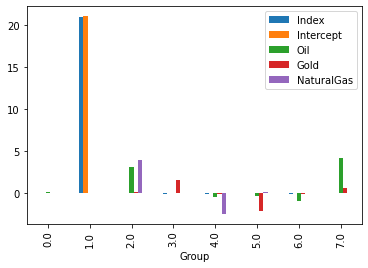

In [ ]:
df.groupby("Group").mean().plot(kind='bar')
plt.show()

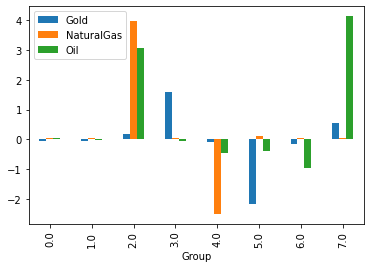

In [ ]:
df[["Gold","NaturalGas","Oil","Group"]].groupby("Group").mean().plot(kind='bar')
plt.show()

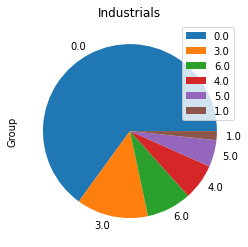

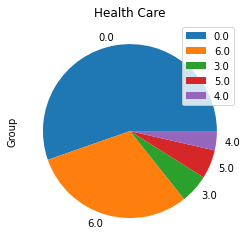

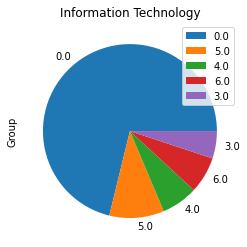

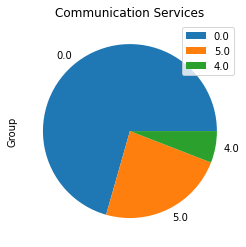

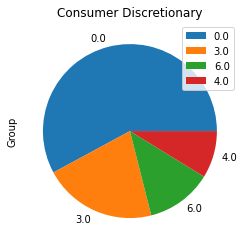

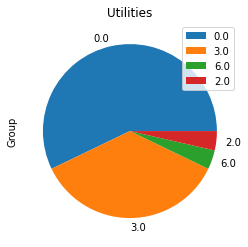

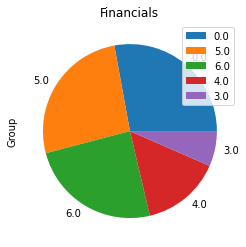

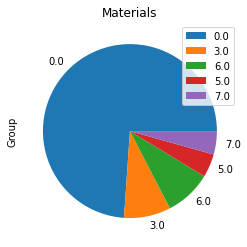

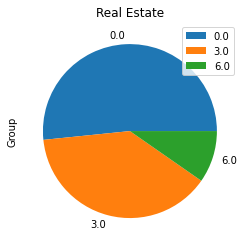

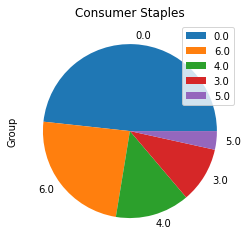

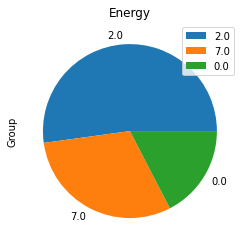

In [ ]:
for x in df["GICS Sector"].unique():
    frame = df[df["GICS Sector"]==x]
    frame["Group"].value_counts().plot(kind='pie',legend=True,title=x)
    plt.show()